In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from upsetplot import UpSet, from_contents
import seaborn as sns
from matplotlib_venn import venn2
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
Tf_acts = pd.read_csv('Data/Activity_TF_in_cGRN.tsv', sep='\t', index_col=0)
Tf_acts_with_0 = Tf_acts.copy() 
Tf_acts = Tf_acts.loc[(Tf_acts !=0).any(axis=1)]

In [5]:
mapper_cluster = pd.read_csv('./Mapper_node_df.tsv', sep='\t')
mapper_cluster.rename(columns={'Gene':'Gene_Name'}, inplace=True)
mapper_cluster.set_index('Gene_Name', inplace=True)
mapper_cluster = mapper_cluster[mapper_cluster.index.isin(Tf_acts.index)]

In [6]:
# # Step 1: Define sample types based on sample names
# sample_names = Tf_acts.columns  # Assuming this contains your sample names
# sample_types = []

# # Manually define sample types based on your naming convention
# for name in sample_names:
#     if "incognita" in name.lower():
#         sample_types.append("RKN")
#     elif "pstvd" in name.lower():
#         sample_types.append("Virus")
#     elif "infestans" in name.lower():
#         sample_types.append("Oomycete")
#     else:
#         sample_types.append("Fungus")

# # Step 2: Create a color palette for sample types
# sample_type_colors = {
#     "RKN": "sienna",
#     "Virus": "salmon",
#     "Oomycete": "lawngreen",
#     "Fungus": "darkolivegreen"
# }
# # Map the colors based on sample types
# col_colors = [sample_type_colors[sample_types[i]] for i in range(len(sample_types))]

# # Convert col_colors to a DataFrame
# col_colors_df = pd.DataFrame(col_colors, index=sample_names, columns=['Pathogen Type'])

# for clust in mapper_cluster['Value'].unique():
#     mapper = mapper_cluster[mapper_cluster['Value'] == clust]
#     data = Tf_acts[Tf_acts.index.isin(mapper.index)]
#     if mapper.shape[0] != 1:
#         g = sns.clustermap(
#             data,
#             cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
#             col_cluster=True,
#             row_cluster=True,
#             center=0,
#             annot=True,
#             cbar_kws={'label': 'TF activity'},
#             method='average',
#             metric='correlation',
#             col_colors=col_colors_df['Pathogen Type'],
#             figsize=(10, 12),
#             fmt = ".2f"
#         )
#         g.figure.suptitle('Cluser_'+str(clust))
#         # g.savefig('./clustermap_clusters/Clustermap_'+str(clust)+'.png',format='png')

In [7]:
# res_TDA = pd.read_csv('./Results_hubs_by_TDA.tsv', sep='\t')

In [8]:
# acts_tda = Tf_acts[Tf_acts.index.isin(res_TDA['OLN'])]

In [9]:
# # Step 1: Define sample types based on sample names
# sample_names = acts_tda.columns  # Assuming this contains your sample names
# sample_types = []

# # Manually define sample types based on your naming convention
# for name in sample_names:
#     if "incognita" in name.lower():
#         sample_types.append("RKN")
#     elif "pstvd" in name.lower():
#         sample_types.append("Virus")
#     elif "infestans" in name.lower():
#         sample_types.append("Oomycete")
#     else:
#         sample_types.append("Fungus")

# # Step 2: Create a color palette for sample types
# sample_type_colors = {
#     "RKN": "sienna",
#     "Virus": "salmon",
#     "Oomycete": "lawngreen",
#     "Fungus": "darkolivegreen"
# }

# # Map the colors based on sample types
# col_colors = [sample_type_colors[sample_types[i]] for i in range(len(sample_types))]

# # Convert col_colors to a DataFrame
# col_colors_df = pd.DataFrame(col_colors, index=sample_names, columns=['Pathogen Type'])

# # Create the clustermap
# g = sns.clustermap(
#     acts_tda,
#     cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
#     col_cluster=True,
#     row_cluster=True,
#     center=0,
#     annot=True,
#     cbar_kws={'label': 'TF activity'},
#     method='average',
#     metric='correlation',
#     col_colors=col_colors_df['Pathogen Type'],
#     figsize=(10, 12)
# )

# # Retrieve the order of columns after clustering
# ordered_indices = g.dendrogram_col.reordered_ind  # Get the order of columns

# # Overlay sample type labels for each column color
# for idx, ordered_idx in enumerate(ordered_indices):
#     sample_type = sample_types[ordered_idx]  # Get the correct sample type
#     color = sample_type_colors[sample_type]  # Get the corresponding color for the sample type
#     g.ax_col_colors.text(
#         idx + 0.5, 0.5, sample_type, ha='center', va='center', color='black',  # Text color set to black
#         fontsize=8, weight='bold'
#     )

# # g.savefig("./Clustermap_TDA_TF.svg", format='svg')
# plt.show()

*****

New Plots

In [10]:
info = pd.read_csv('../Results_hubs_activity_stats.tsv', sep='\t')

In [11]:
tda_cluster = pd.read_csv('./Mapper_node_df.tsv', sep='\t')
tda_cluster.rename(columns={'Value':'Clusters'}, inplace=True)

In [12]:
Res_TDA = pd.merge(info, tda_cluster, left_on='OLN', right_on='Gene')

In [13]:
# Res_TDA = pd.read_csv('./Results_with_TDA_cluster.txt', sep='\t')
Res_TDA.rename(columns={'gene.family':'Family'}, inplace=True)

In [14]:
Res_TDA['OLN'].unique().shape

(71,)

In [15]:
custom_cluster = {1: [0,2,3,5],
                  2: [7],
                  3: [9,18,13,15,17,11],
                  4: [19]}

In [16]:
cluster_to_mega = {cluster: mega for mega, clusters in custom_cluster.items() for cluster in clusters}

In [17]:
Res_TDA['MegaCluster'] = Res_TDA['Clusters'].map(cluster_to_mega)
Res_TDA['MegaCluster'].fillna(0, inplace=True)

In [23]:
agg_dict = {col: 'first' for col in Res_TDA.columns if col not in ['OLN', 'Clusters', 'MegaCluster']}
agg_dict['Clusters'] = lambda x: sorted(set(x))
agg_dict['MegaCluster'] = lambda x: sorted(set(x))

df_aggregated = Res_TDA.groupby('OLN').agg(agg_dict).reset_index()

In [25]:
df_aggregated.drop(columns=['Gene'], inplace=True)

In [31]:
degree_info = pd.read_csv('./Degree_CGRN.tsv', sep='\t')
degree_info.rename(columns={'Gene_Name':'OLN'}, inplace=True)

In [32]:
Complete_info = pd.merge(df_aggregated, degree_info, on='OLN', how='left')

In [44]:
Padj_DE = pd.read_csv('../DEA/Merge_padj_groups_all.tsv', sep='\t')
Padj_DE.rename(columns={'Unnamed: 0':'Gene_Name'}, inplace=True)

In [ ]:
Complete_info = pd.merge(Complete_info, Padj_DE, on='Gene_Name', how='left')
Complete_info.drop(columns=['Gene_Name'], inplace=True)
Complete_info.rename(columns={'gene.description':'Description'}, inplace=True)

In [50]:
Complete_info.columns

Index(['OLN', 'gene.description', 'Family', 'stats_Pinfestans',
       'stats_Cfulvum', 'stats_PSTVd_S23', 'stats_PSTVd_M', 'stats_Bcinerea',
       'stats_Mincognita_7dpi', 'stats_Mincognita_14dpi', 'Pinfestans_acts',
       'Cfulvum_acts', 'PSTVd_S23_acts', 'PSTVd_M_acts', 'Bcinerea_acts',
       'Mincognita_7dpi_acts', 'Mincognita_14dpi_acts', 'Pinfestans_pval',
       'Cfulvum_pval', 'PSTVd_S23_pval', 'PSTVd_M_pval', 'Bcinerea_pval',
       'Mincognita_7dpi_pval', 'Mincognita_14dpi_pval', 'Groups', 'Clusters',
       'MegaCluster', 'In_Degree', 'Out_Degree', 'Total_Degree',
       'padj_Pinfestans', 'padj_Cfulvum', 'padj_PSTVd_S23', 'padj_PSTVd_M',
       'padj_Bcinerea', 'padj_Mincognita_7dpi', 'padj_Mincognita_14dpi',
       'Groups_DEA'],
      dtype='object')

In [52]:
Column_order = ['OLN', 'Description', 'Family', 'Clusters',
       'MegaCluster', 'In_Degree', 'Out_Degree', 'Total_Degree','stats_Pinfestans',
       'stats_Cfulvum', 'stats_PSTVd_S23', 'stats_PSTVd_M', 'stats_Bcinerea',
       'stats_Mincognita_7dpi', 'stats_Mincognita_14dpi', 'padj_Pinfestans', 
       'padj_Cfulvum', 'padj_PSTVd_S23', 'padj_PSTVd_M',
       'padj_Bcinerea', 'padj_Mincognita_7dpi', 'padj_Mincognita_14dpi',
       'Groups_DEA',
       'Pinfestans_acts',
       'Cfulvum_acts', 'PSTVd_S23_acts', 'PSTVd_M_acts', 'Bcinerea_acts',
       'Mincognita_7dpi_acts', 'Mincognita_14dpi_acts', 'Pinfestans_pval',
       'Cfulvum_pval', 'PSTVd_S23_pval', 'PSTVd_M_pval', 'Bcinerea_pval',
       'Mincognita_7dpi_pval', 'Mincognita_14dpi_pval', 'Groups',
       ]

In [55]:
Complete_info = Complete_info[Column_order]

In [56]:
Complete_info.to_csv('./Results_hubs_activity_stats_mega_cluster-SUPP_table.tsv', sep='\t', index=False)

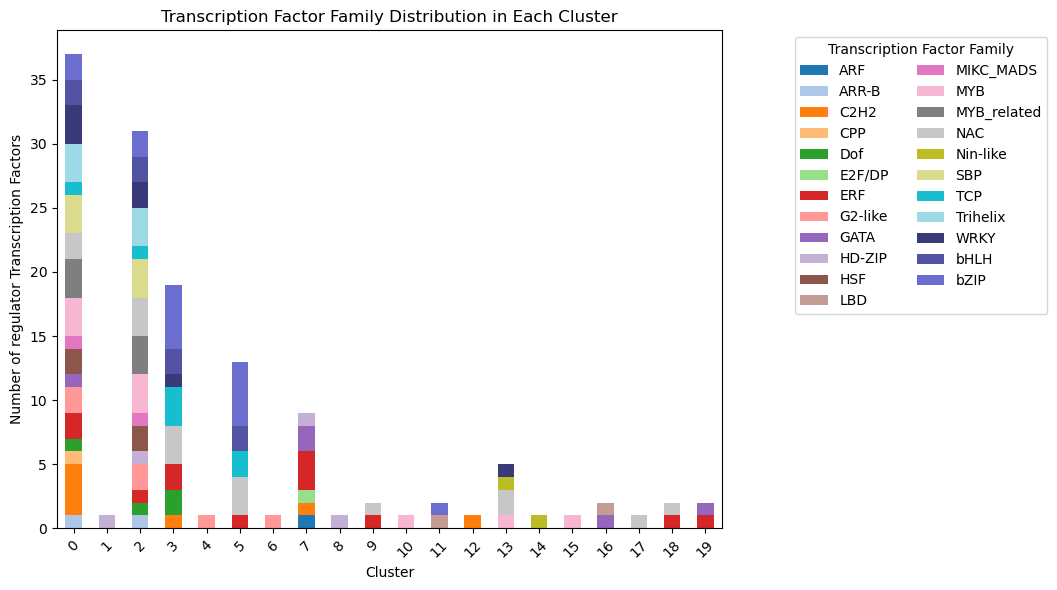

In [ ]:
# import hashlib
# # Generate 25 distinct colors
# colors = plt.cm.tab20.colors + plt.cm.tab20b.colors

# # Take the first 25 distinct colors
# colors = colors[:25]
# # Grouping the DataFrame by community and transcription factor family
# grouped_df = Res_TDA.groupby(['Clusters', 'Family']).size().unstack(fill_value=0)

# # Generate unique colors based on entity names
# color_dict = {entity: colors[i % len(colors)] for i, entity in enumerate(grouped_df.columns)}
# # Plotting
# grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[color_dict[col] for col in grouped_df.columns])
# plt.title('Transcription Factor Family Distribution in Each Cluster')
# plt.xlabel('Cluster')
# plt.ylabel('Number of regulator Transcription Factors')
# plt.legend(title='Transcription Factor Family', loc='best', ncol=2,bbox_to_anchor=(1, 0.5, 0.5, 0.5))
# plt.xticks(rotation=45)
# # plt.yticks(range(0,35))
# plt.tight_layout()
# plt.show()

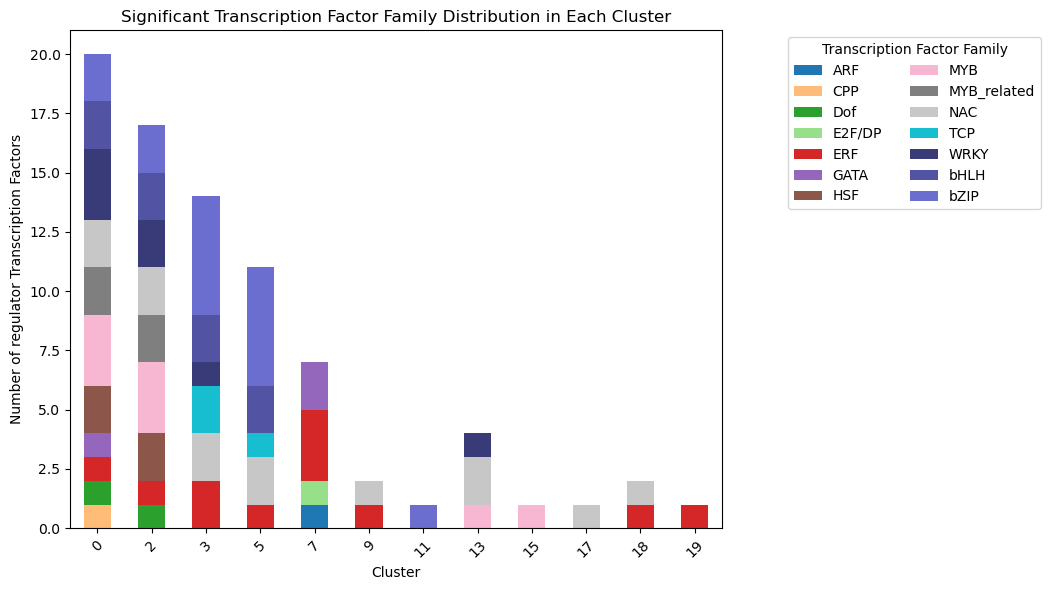

In [ ]:
# Res_TDA_signif = Res_TDA[~Res_TDA['Groups'].isna()]
# grouped_df = Res_TDA_signif.groupby(['Clusters', 'Family']).size().unstack(fill_value=0)
# # Plotting
# grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[color_dict[col] for col in grouped_df.columns])
# plt.title('Significant Transcription Factor Family Distribution in Each Cluster')
# plt.xlabel('Cluster')
# plt.ylabel('Number of regulator Transcription Factors')
# plt.legend(title='Transcription Factor Family', loc='best', ncol=2,bbox_to_anchor=(1, 0.5, 0.5, 0.5))
# plt.xticks(rotation=45)
# # plt.yticks(range(0,35))
# plt.tight_layout()
# plt.show()

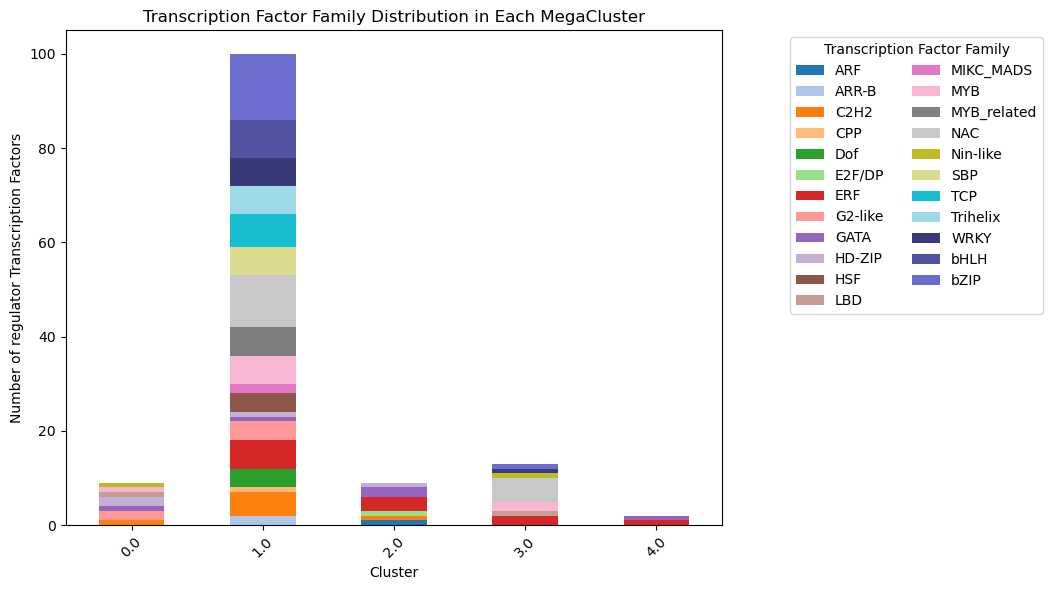

In [ ]:
# grouped_df = Res_TDA.groupby(['MegaCluster', 'Family']).size().unstack(fill_value=0)
# # Plotting
# grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[color_dict[col] for col in grouped_df.columns])
# plt.title('Transcription Factor Family Distribution in Each MegaCluster')
# plt.xlabel('Cluster')
# plt.ylabel('Number of regulator Transcription Factors')
# plt.legend(title='Transcription Factor Family', loc='best', ncol=2,bbox_to_anchor=(1, 0.5, 0.5, 0.5))
# plt.xticks(rotation=45)
# # plt.yticks(range(0,35))
# plt.tight_layout()
# plt.show()

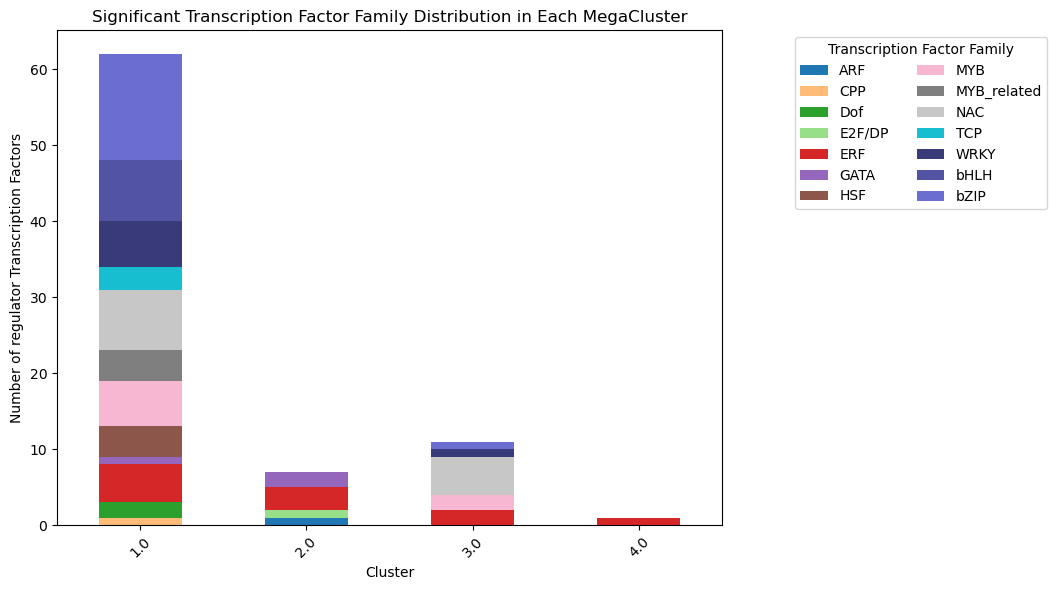

In [ ]:
# grouped_df = Res_TDA_signif.groupby(['MegaCluster', 'Family']).size().unstack(fill_value=0)
# # Plotting
# grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[color_dict[col] for col in grouped_df.columns])
# plt.title('Significant Transcription Factor Family Distribution in Each MegaCluster')
# plt.xlabel('Cluster')
# plt.ylabel('Number of regulator Transcription Factors')
# plt.legend(title='Transcription Factor Family', loc='best', ncol=2,bbox_to_anchor=(1, 0.5, 0.5, 0.5))
# plt.xticks(rotation=45)
# # plt.yticks(range(0,35))
# plt.tight_layout()
# plt.show()

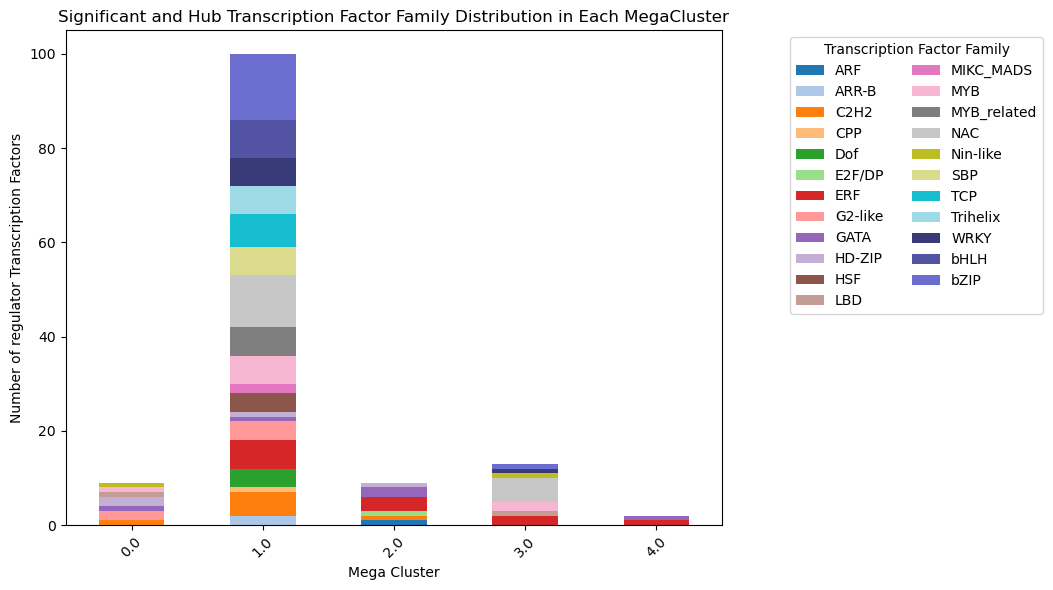

In [ ]:
# # Res_TDA_mega = pd.read_csv('./Results_hubs_by_TDA_mega_cluster.tsv', sep='\t')

# grouped_df = Res_TDA.groupby(['MegaCluster', 'Family']).size().unstack(fill_value=0)
# # Plotting
# grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[color_dict[col] for col in grouped_df.columns])
# plt.title('Significant and Hub Transcription Factor Family Distribution in Each MegaCluster')
# plt.xlabel('Mega Cluster')
# plt.ylabel('Number of regulator Transcription Factors')
# plt.legend(title='Transcription Factor Family', loc='best', ncol=2,bbox_to_anchor=(1, 0.5, 0.5, 0.5))
# plt.xticks(rotation=45)
# # plt.yticks(range(0,35))
# plt.tight_layout()
# plt.show()

In [ ]:
# Info=Res_TDA_signif[['OLN','Family','Clusters','MegaCluster','Groups']]

In [ ]:
# Info['Groups'] = Info['Groups'].str.split(' & ')
# Info = Info.explode('Groups')
# Info['Groups'] = Info['Groups'].str.replace('_pval','', regex=False)

/tmp/ipykernel_265368/70763545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Info['Groups'] = Info['Groups'].str.split(' & ')


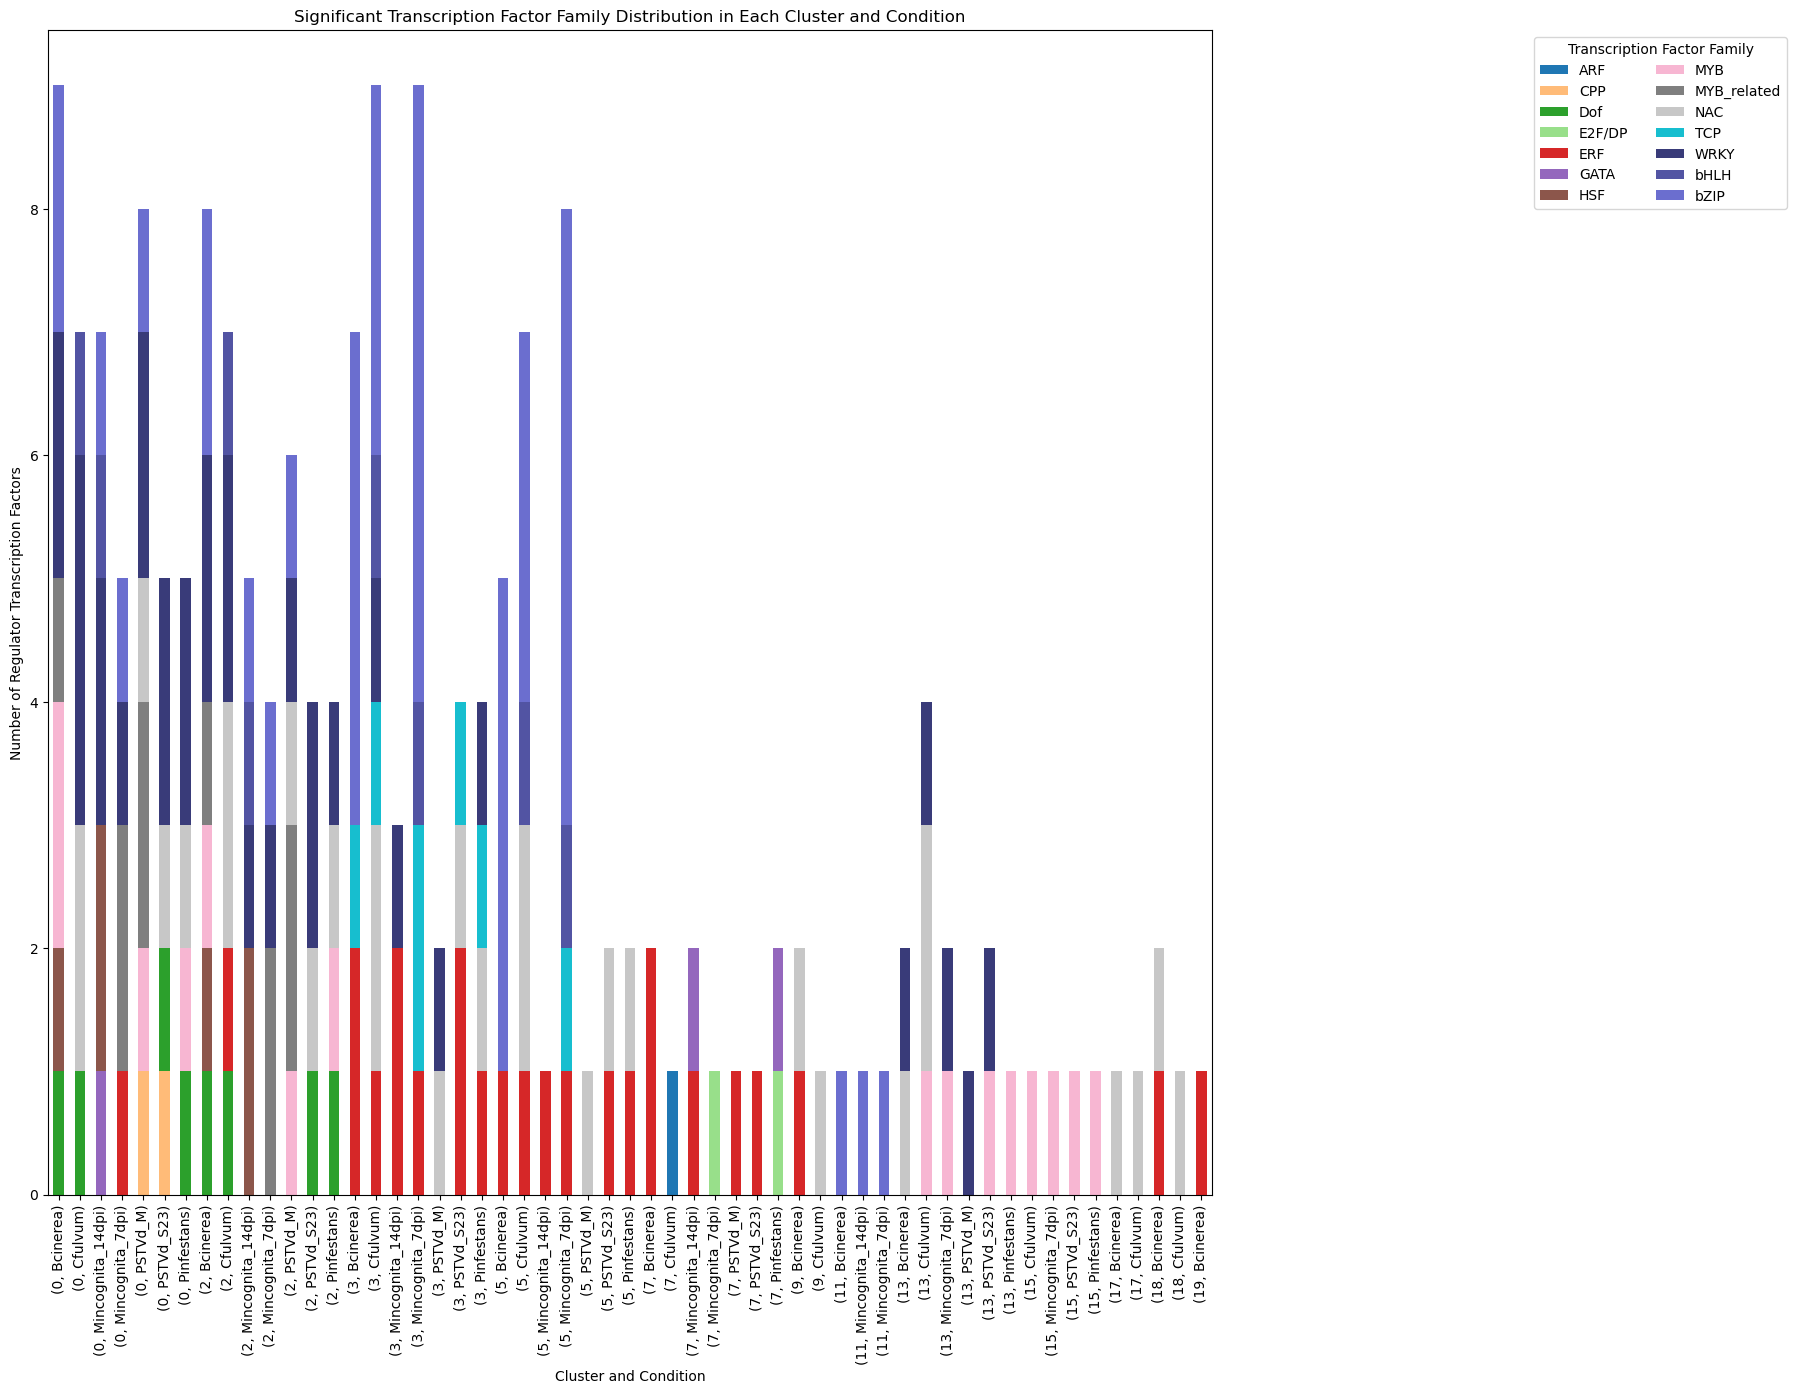

In [ ]:
# # Grouping by both Clusters and Groups (condition) and unstacking
# grouped_df = Info.groupby(['Clusters', 'Groups', 'Family']).size().unstack(fill_value=0)

# # Plotting
# fig, ax = plt.subplots(figsize=(20, 15))  # Increase figure size for better spacing
# grouped_df.plot(kind='bar', stacked=True, ax=ax, color=[color_dict.get(col, 'gray') for col in grouped_df.columns])

# # Adding titles and labels
# ax.set_title('Significant Transcription Factor Family Distribution in Each Cluster and Condition')
# ax.set_xlabel('Cluster and Condition')
# ax.set_ylabel('Number of Regulator Transcription Factors')

# # Get the x-tick positions
# xticks = range(len(grouped_df.index))

# # Handle legend
# ax.legend(title='Transcription Factor Family', loc='best', ncol=2, bbox_to_anchor=(1, 0.5, 0.5, 0.5))

# # Adjust layout for better spacing and avoid overlap
# plt.tight_layout()

# # Optionally adjust spacing further if needed
# plt.subplots_adjust(bottom=0.2)

# plt.show()

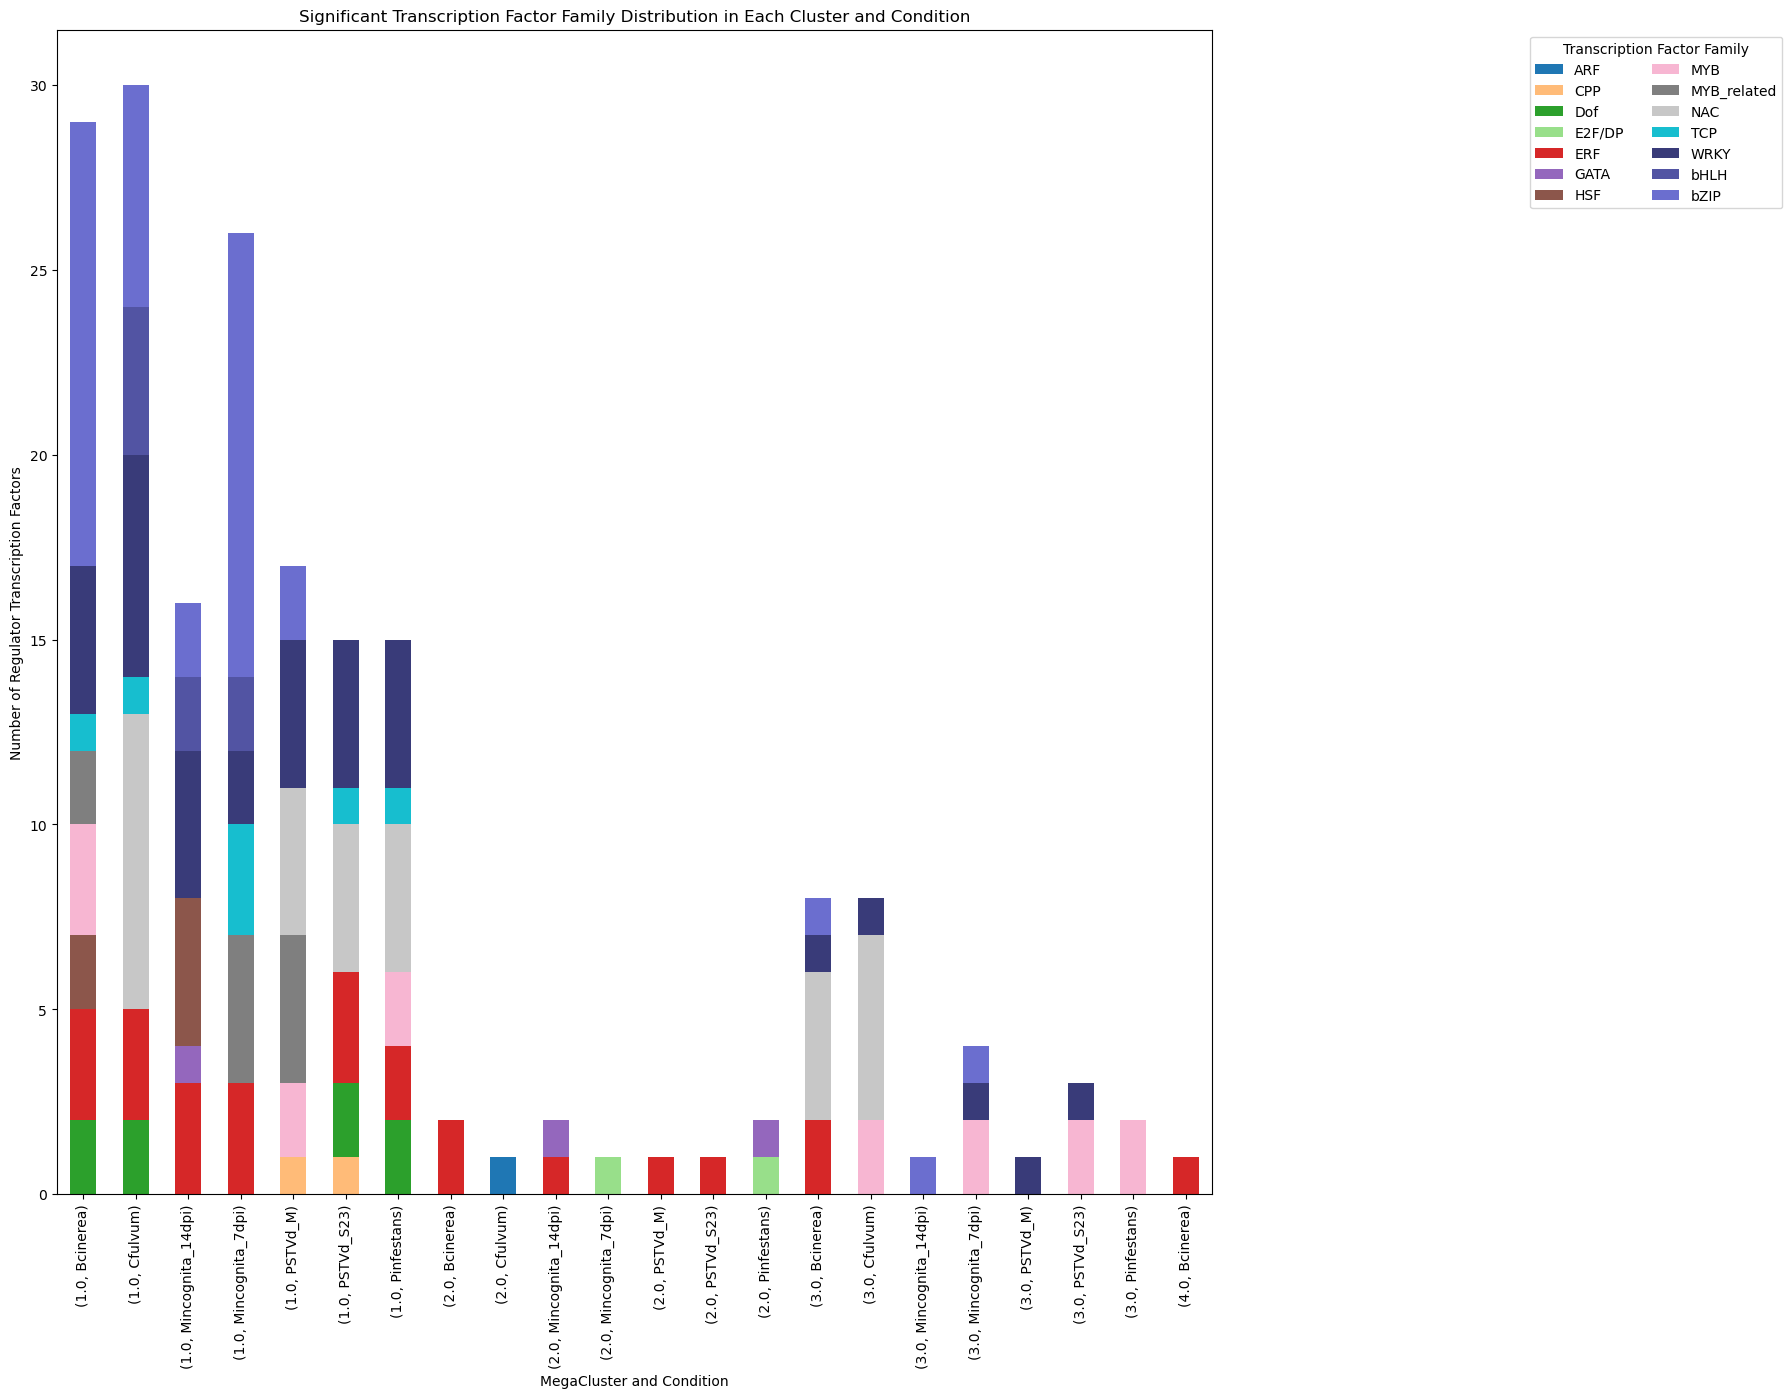

In [ ]:
# # Grouping by both Clusters and Groups (condition) and unstacking
# grouped_df = Info.groupby(['MegaCluster', 'Groups', 'Family']).size().unstack(fill_value=0)

# # Plotting
# fig, ax = plt.subplots(figsize=(20, 15))  # Increase figure size for better spacing
# grouped_df.plot(kind='bar', stacked=True, ax=ax, color=[color_dict.get(col, 'gray') for col in grouped_df.columns])

# # Adding titles and labels
# ax.set_title('Significant Transcription Factor Family Distribution in Each Cluster and Condition')
# ax.set_xlabel('MegaCluster and Condition')
# ax.set_ylabel('Number of Regulator Transcription Factors')

# # Get the x-tick positions
# xticks = range(len(grouped_df.index))

# # Handle legend
# ax.legend(title='Transcription Factor Family', loc='best', ncol=2, bbox_to_anchor=(1, 0.5, 0.5, 0.5))

# # Adjust layout for better spacing and avoid overlap
# plt.tight_layout()

# # Optionally adjust spacing further if needed
# plt.subplots_adjust(bottom=0.2)

# plt.show()

In [29]:
# df=Res_TDA[['OLN','Family','Clusters','MegaCluster','Groups']]
# df['Groups']=df['Groups'].fillna('Not Significant')
# conditions = ['Pinfestans','Cfulvum','PSTVd_S23','PSTVd_M','Bcinerea','Mincognita_7dpi','Mincognita_14dpi']
# for condition in conditions:
#     df['Groups_spe']=df['Groups'].str.contains(condition)
#     df['Groups_spe']=df['Groups_spe'].replace({True:'Significant',False:'Not Significant'})
#     # Group by MegaCluster, Clusters, and Significance to count the number of TFs
#     grouped = df.groupby(['Clusters', 'Groups_spe']).size().reset_index(name='Count')

#     # Create a pivot table for plotting
#     pivot = grouped.pivot_table(index='Clusters', columns='Groups_spe', values='Count', fill_value=0)

#     custom_order = [0,2,3,5, 7,19, 9,13,15,17,18, 11, 1,4,6,8,14,16]
#     # Define colors for the plot
#     colors = ['silver', 'gold']  # List of colors for the 'True' and 'False' categories
#     pivot = pivot.loc[custom_order]

#     # Plot the stacked barplot using seaborn
#     ax = pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

#     ax.vlines(3.5, *ax.get_ylim(), color='black', linestyle='--')
#     ax.text(1.5, ax.get_ylim()[1] * 1, 'Mega Cluster 1', ha='center', va='center', rotation=0, color='black', fontsize=12)
#     ax.vlines(5.5, *ax.get_ylim(), color='black', linestyle='--')
#     ax.text(4.5, ax.get_ylim()[1] * 1, 'Mega Cluster 2', ha='center', va='center', rotation=0, color='black', fontsize=12)
#     ax.vlines(10.5, *ax.get_ylim(), color='black', linestyle='--')
#     ax.text(8, ax.get_ylim()[1] * 0.9, 'Mega Cluster 3', ha='center', va='center', rotation=0, color='black', fontsize=12)
#     ax.vlines(11.5, *ax.get_ylim(), color='black', linestyle='--')
#     ax.text(11, ax.get_ylim()[1] * 0.9, 'Mega Cluster 4', ha='center', va='center', rotation=0, color='black', fontsize=12)
#     ax.text(15, ax.get_ylim()[1] * 0.9, 'Not in Mega Cluster', ha='center', va='center', rotation=0, color='black', fontsize=12)
#     # Set plot labels and title
#     plt.title(f'TFs per Cluster by Significance in  {condition}')
#     plt.xlabel('Cluster')
#     plt.ylabel('Number of TFs')
#     plt.xticks(rotation=45, ha='right')
#     plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
    
#     plt.tight_layout()
#     # plt.savefig(f'./Plots/TF_per_cluster_by_significance_in_{condition}.png', format='png')
#     plt.show()

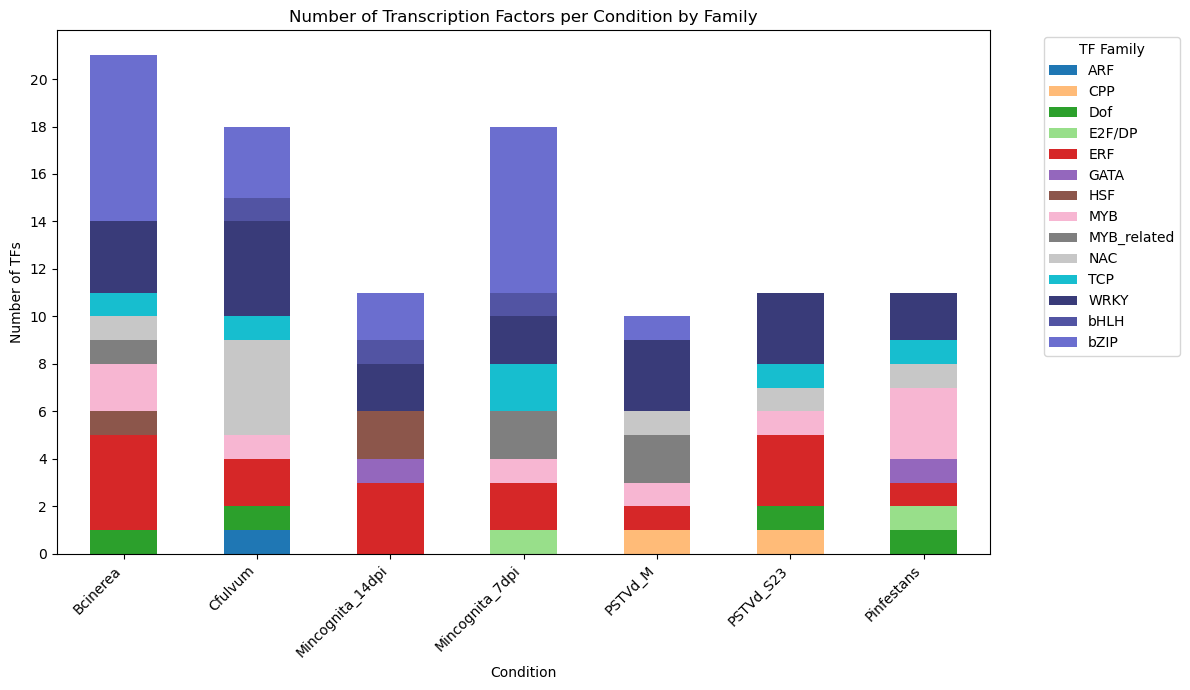

In [ ]:
# df = Res_TDA[['OLN','Family','Groups']].drop_duplicates()
# df = df[df['Groups'].notna()]
# df['Groups']=df['Groups'].str.replace('_pval','', regex=False)
# # Split the 'Groups' column into separate conditions by '&' and explode them
# df['Groups'] = df['Groups'].str.split('&')
# df_exploded = df.explode('Groups')

# # Strip extra whitespace
# df_exploded['Groups'] = df_exploded['Groups'].str.strip()

# # Count the occurrences of each Family within each Condition
# plot_data = df_exploded.groupby(['Groups', 'Family']).size().unstack(fill_value=0)

# # Map the family colors to the plot data
# family_colors = plot_data.columns.map(color_dict)

# # Create the stacked barplot with custom colors
# ax = plot_data.plot(kind='bar', stacked=True, figsize=(12, 7), color=family_colors)

# # Set plot labels and title
# plt.title('Number of Transcription Factors per Condition by Family')
# plt.xlabel('Condition')
# plt.ylabel('Number of TFs')
# plt.xticks(rotation=45, ha='right')
# ax.set_yticks(range(0, 21, 2))
# plt.legend(title='TF Family', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# # Show the plot
# plt.show()

/tmp/ipykernel_265368/1042560545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Groups_glob']=df['Groups'].isna()
/tmp/ipykernel_265368/1042560545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Groups_glob']=df['Groups_glob'].replace({True:'Not Significant',False:'Significant'})


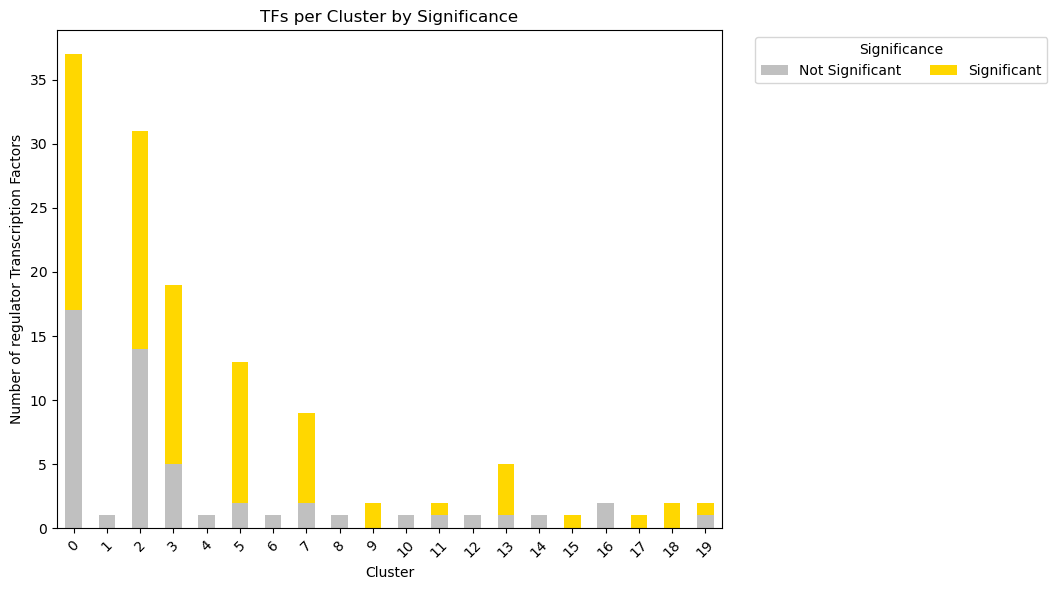

In [ ]:
# df=Res_TDA[['OLN','Family','Clusters','MegaCluster','Groups']]
# df['Groups_glob']=df['Groups'].isna()
# df['Groups_glob']=df['Groups_glob'].replace({True:'Not Significant',False:'Significant'})
# # Grouping the DataFrame by community and transcription factor family
# grouped_df = df.groupby(['Clusters', 'Groups_glob']).size().unstack(fill_value=0)
# grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['silver', 'gold'])
# plt.title('TFs per Cluster by Significance')
# plt.xlabel('Cluster')
# plt.ylabel('Number of regulator Transcription Factors')
# plt.legend(title='Significance', loc='best', ncol=2,bbox_to_anchor=(1, 0.5, 0.5, 0.5))
# plt.xticks(rotation=45)
# # plt.yticks(range(0,35))
# plt.tight_layout()
# plt.show()

In [32]:
# grouped_df.to_csv('Significant_TFs_per_cluster.tsv', sep='\t')

In [ ]:
# Res_TDA

,OLN,gene.description,Family,Gene_Name,stats_Pinfestans,stats_Cfulvum,stats_PSTVd_S23,stats_PSTVd_M,stats_Bcinerea,stats_Mincognita_7dpi,...,Cfulvum_pval,PSTVd_S23_pval,PSTVd_M_pval,Bcinerea_pval,Mincognita_7dpi_pval,Mincognita_14dpi_pval,Groups,Clusters,Gene,MegaCluster
0,Solyc01g065540,Two-component response regulator (AHRD V3.3 **...,ARR-B,mRNA:Solyc01g065540.3.1,-4.455095,0.180276,-1.750119,-1.426726,-2.656717,1.488227,...,0.987131,0.449494,0.977352,0.469479,0.787824,0.876008,NaN,0,Solyc01g065540,1.0
1,Solyc01g065540,Two-component response regulator (AHRD V3.3 **...,ARR-B,mRNA:Solyc01g065540.3.1,-4.455095,0.180276,-1.750119,-1.426726,-2.656717,1.488227,...,0.987131,0.449494,0.977352,0.469479,0.787824,0.876008,NaN,2,Solyc01g065540,1.0
2,Solyc01g087990,MADS-box transcription factor (AHRD V3.3 *** Q...,MIKC_MADS,mRNA:Solyc01g087990.3.1,4.221559,1.444226,-4.224183,-2.188224,10.798838,11.264234,...,0.466767,0.671175,0.561975,0.763080,0.666835,0.529978,NaN,0,Solyc01g087990,1.0
3,Solyc01g087990,MADS-box transcription factor (AHRD V3.3 *** Q...,MIKC_MADS,mRNA:Solyc01g087990.3.1,4.221559,1.444226,-4.224183,-2.188224,10.798838,11.264234,...,0.466767,0.671175,0.561975,0.763080,0.666835,0.529978,NaN,2,Solyc01g087990,1.0
4,Solyc01g095460,Common plant regulatory factor.1,bZIP,mRNA:Solyc01g095460.3.1,5.347496,0.349682,0.460056,4.692626,-9.241774,-1.461664,...,0.000556,0.302659,0.171252,0.000022,0.021766,0.925405,Cfulvum_pval & Bcinerea_pval & Mincognita_7dpi...,3,Solyc01g095460,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Solyc12g077540,Trihelix transcription factor GT.1,Trihelix,mRNA:Solyc12g077540.3.1,-1.362655,0.186735,1.627094,1.444984,-1.499088,0.434582,...,0.505469,0.523959,0.177163,0.948274,0.560831,0.616965,NaN,2,Solyc12g077540,1.0
129,Solyc12g056510,Trihelix transcription factor GT.1,Trihelix,mRNA:Solyc12g056510.3.1,-8.372501,-5.074986,-1.205418,-1.664083,-8.653891,-12.560371,...,0.966492,0.976567,0.493563,0.828962,0.549384,0.608598,NaN,0,Solyc12g056510,1.0
130,Solyc12g056510,Trihelix transcription factor GT.1,Trihelix,mRNA:Solyc12g056510.3.1,-8.372501,-5.074986,-1.205418,-1.664083,-8.653891,-12.560371,...,0.966492,0.976567,0.493563,0.828962,0.549384,0.608598,NaN,2,Solyc12g056510,1.0
131,Solyc12g099370,GATA transcription factor 23 (AHRD V3.3 *** A0...,GATA,mRNA:Solyc12g099370.2.1,-4.543346,5.442820,-1.535575,-0.874022,4.344998,0.233047,...,0.485184,0.263473,0.104247,0.246065,0.379379,0.029246,Mincognita_14dpi_pval,0,Solyc12g099370,1.0


In [34]:
Res_TDA.columns

Index(['OLN', 'gene.description', 'Family', 'Gene_Name', 'stats_Pinfestans',
       'stats_Cfulvum', 'stats_PSTVd_S23', 'stats_PSTVd_M', 'stats_Bcinerea',
       'stats_Mincognita_7dpi', 'stats_Mincognita_14dpi', 'Pinfestans_acts',
       'Cfulvum_acts', 'PSTVd_S23_acts', 'PSTVd_M_acts', 'Bcinerea_acts',
       'Mincognita_7dpi_acts', 'Mincognita_14dpi_acts', 'Pinfestans_pval',
       'Cfulvum_pval', 'PSTVd_S23_pval', 'PSTVd_M_pval', 'Bcinerea_pval',
       'Mincognita_7dpi_pval', 'Mincognita_14dpi_pval', 'Groups', 'Clusters',
       'Gene', 'MegaCluster'],
      dtype='object')

In [35]:
Tf_acts[Tf_acts.index == 'Solyc12g099370']['Mincognita_14dpi_acts']

Gene_Name
Solyc12g099370   -2.18192
Name: Mincognita_14dpi_acts, dtype: float64

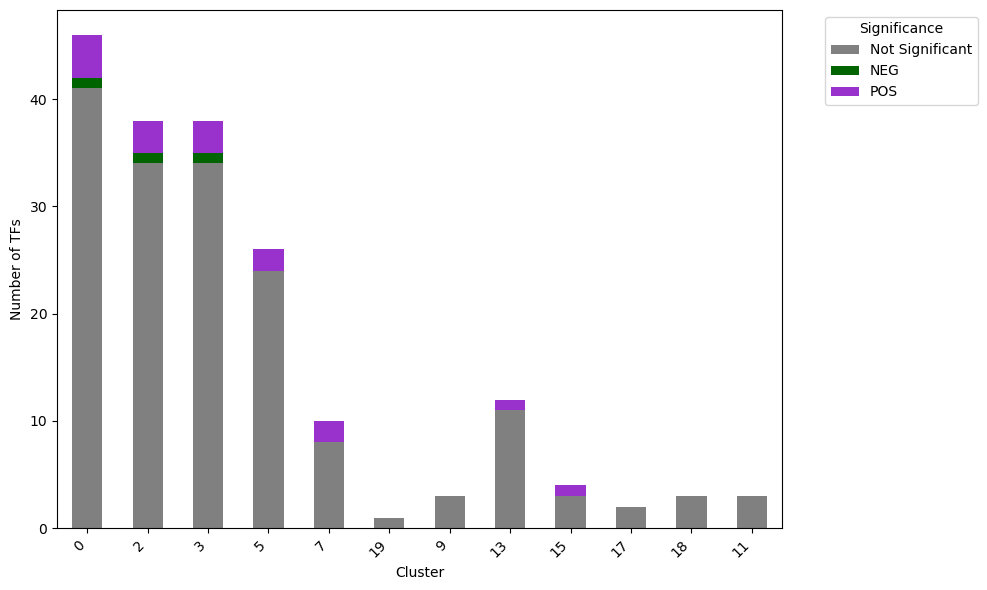

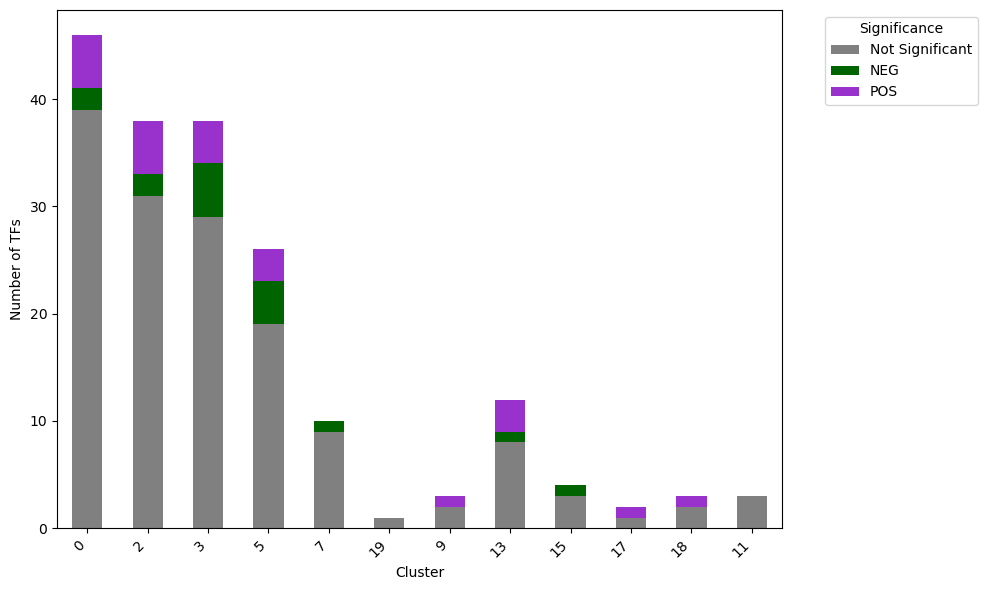

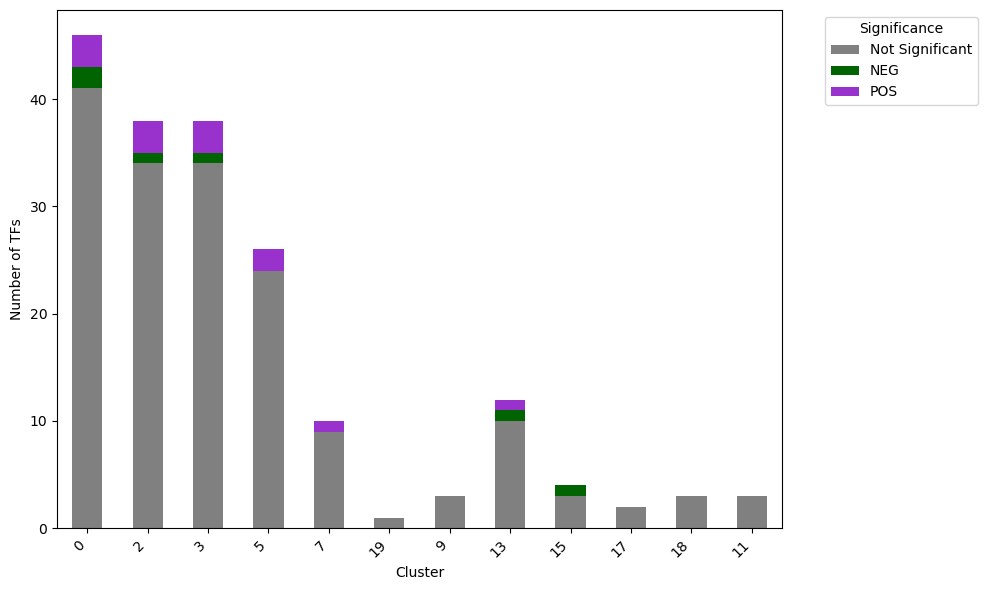

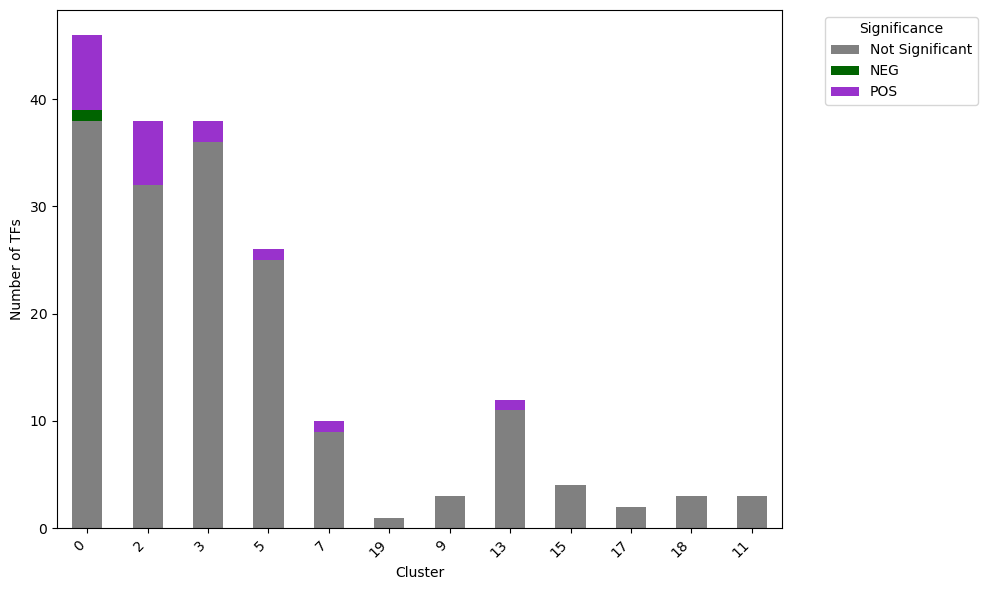

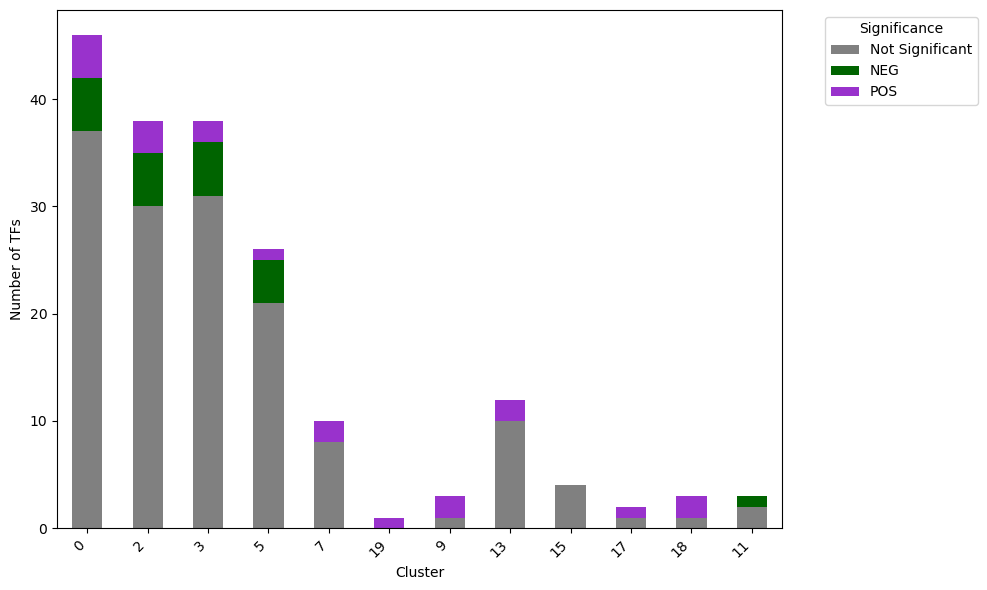

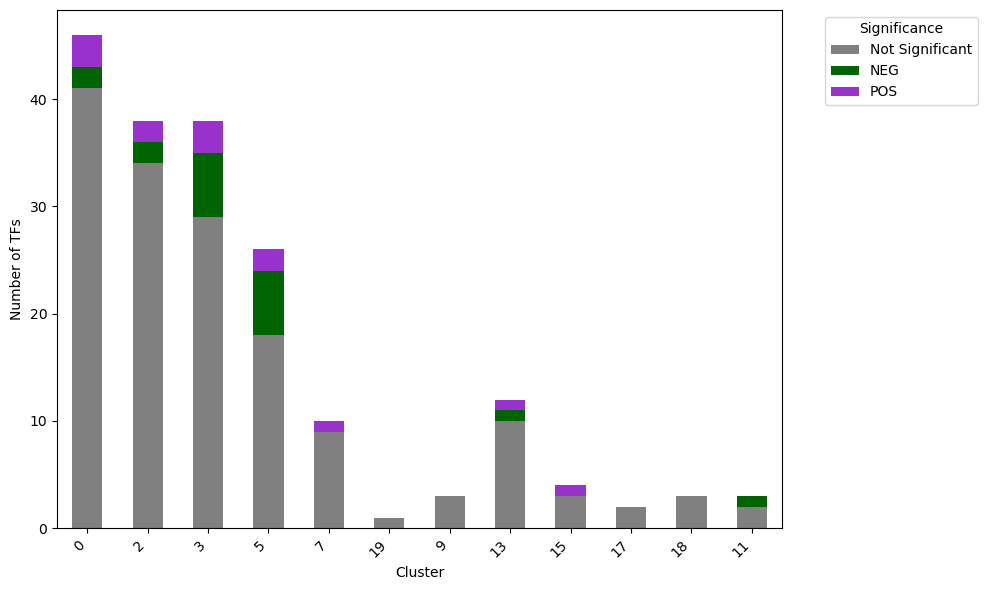

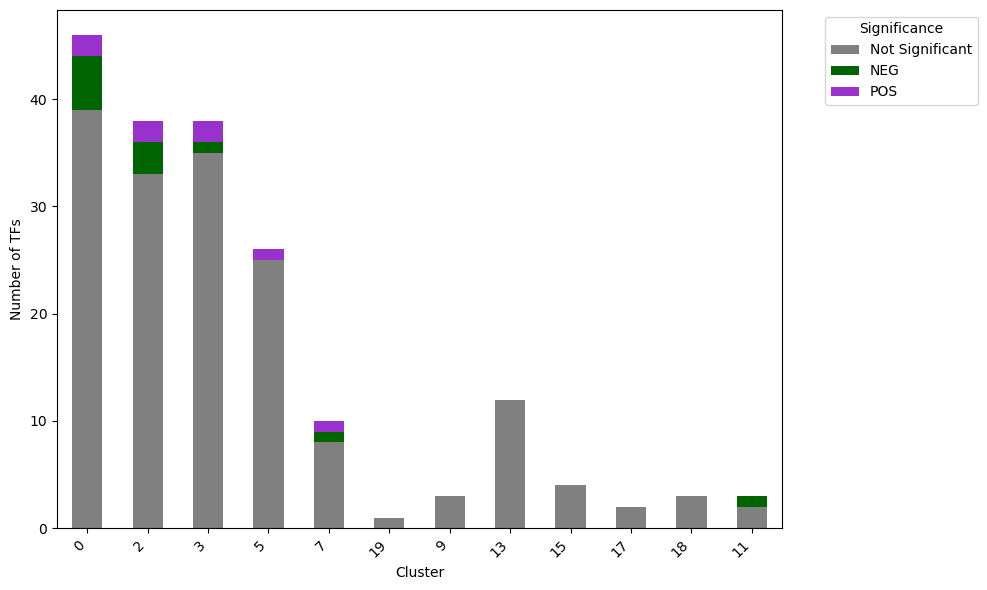

In [36]:
Info_modif = Info.copy()
Info_modif['Groups']=Info_modif['Groups'].fillna('Not Significant')
conditions = ['Pinfestans','Cfulvum','PSTVd_S23','PSTVd_M','Bcinerea','Mincognita_7dpi','Mincognita_14dpi']

Info_modif['Activity_Column'] = Info_modif['Groups'] + "_acts"
def get_sign(row):
    if row["Groups_spe"] == "Significant":
        gene = row["OLN"]  # Get gene name from the row
        activity_col = row["Activity_Column"]  # Get activity column name
        if gene in Tf_acts.index and activity_col in Tf_acts.columns:
            value = Tf_acts.loc[gene, activity_col]  # Lookup value
            return "POS" if value > 0 else "NEG"
    return "Not Significant"


for condition in conditions:
    Info_modif['Groups_spe']=Info_modif['Groups'].str.contains(condition)
    Info_modif['Groups_spe']=Info_modif['Groups_spe'].replace({True:'Significant',False:'Not Significant'})
    Info_modif["Sign"] = Info_modif.apply(get_sign, axis=1)
    # Group by MegaCluster, Clusters, and Significance to count the number of TFs
    grouped = Info_modif.groupby(['Clusters', 'Sign']).size().reset_index(name='Count')

    # Create a pivot table for plotting
    pivot = grouped.pivot_table(index='Clusters', columns='Sign', values='Count', fill_value=0)

    custom_order = [0,2,3,5, 7,19, 9,13,15,17,18, 11]
    # Define colors for the plot
    colors = ['gray', 'darkgreen', 'darkorchid']  # List of colors for the 'True' and 'False' categories
    pivot = pivot.loc[custom_order]

    sign_order = ['Not Significant', 'NEG', 'POS']
    pivot = pivot[sign_order]
    # Plot the stacked barplot using seaborn
    ax = pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

    # ax.vlines(3.5, *ax.get_ylim(), color='black', linestyle='--')
    # ax.text(1.5, ax.get_ylim()[1] * 1, 'Mega Cluster 1', ha='center', va='center', rotation=0, color='black', fontsize=12)
    # ax.vlines(4.5, *ax.get_ylim(), color='black', linestyle='--')
    # ax.text(4, ax.get_ylim()[1] * 1, 'Mega Cluster 2', ha='center', va='center', rotation=0, color='black', fontsize=12)
    # ax.vlines(10.5, *ax.get_ylim(), color='black', linestyle='--')
    # ax.text(7.5, ax.get_ylim()[1] * 0.9, 'Mega Cluster 3', ha='center', va='center', rotation=0, color='black', fontsize=12)
    # ax.vlines(11.4, *ax.get_ylim(), color='black', linestyle='--')
    # ax.text(11, ax.get_ylim()[1] * 0.9, 'Mega Cluster 4', ha='center', va='center', rotation=0, color='black', fontsize=12)
    # Set plot labels and title
    # plt.title(f'TFs per Cluster by Significance in  {condition}')
    plt.xlabel('Cluster')
    plt.ylabel('Number of TFs')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.savefig(f'./Plot/Signif_TF_per_cluster_by_significance_in_{condition}.svg', format='svg')
    plt.show()

-------

Degree vs activity plot

In [37]:
Degree = pd.read_csv('./Degree_CGRN.tsv', sep='\t', index_col=0)

In [38]:
Degree_total = Degree['Total_Degree']

In [39]:
merged=pd.merge(Degree_total, Tf_acts_with_0, left_index=True, right_index=True, how='right')
merged.reset_index(inplace=True)

In [40]:
long_df = pd.melt(merged, id_vars=['Gene_Name','Total_Degree'], var_name='Condition', value_name='Value')

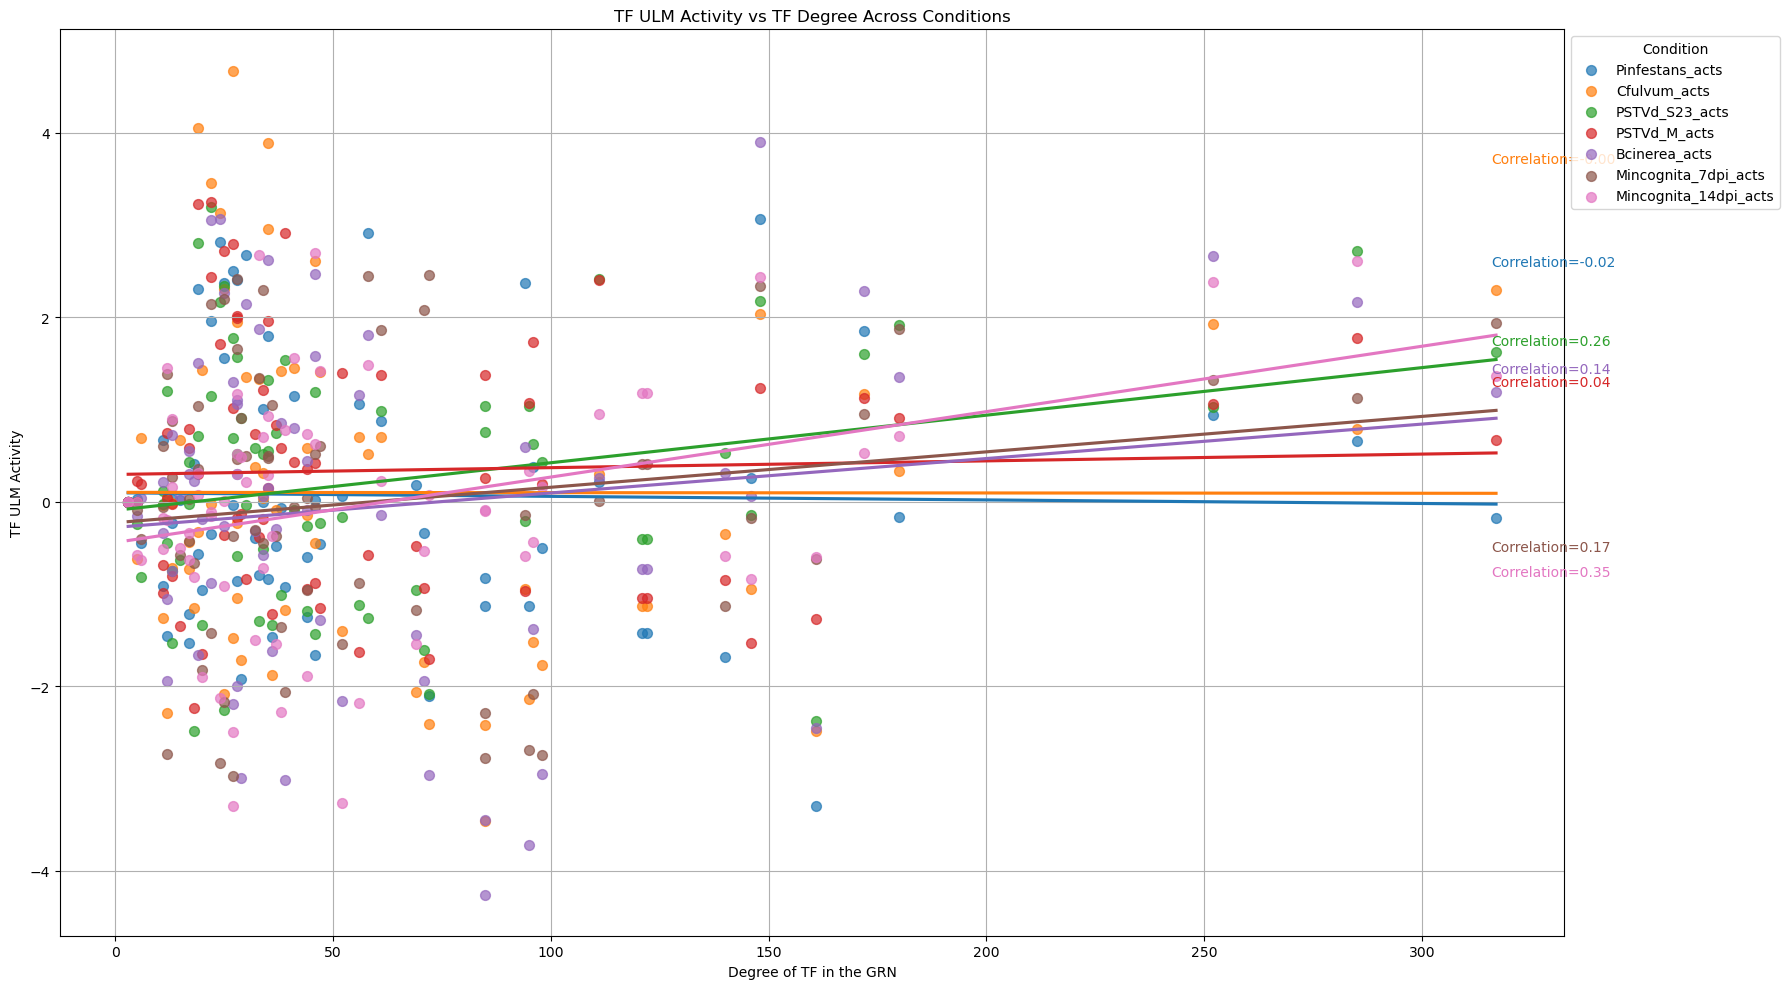

In [41]:
from scipy.stats import pearsonr
plt.figure(figsize=(18, 10))
#Set color palette for conditions
palette = sns.color_palette("tab10", n_colors=len(long_df['Condition'].unique()))
conditions = long_df['Condition'].unique()

# Loop through each condition to plot and annotate R^2
for idx, condition in enumerate(conditions):
    # Filter data for the current condition
    subset = long_df[long_df['Condition'] == condition]
    
    # Plot scatter and regression line
    sns.regplot(
        data=subset,
        x='Total_Degree',
        y='Value',
        scatter_kws={'s': 50, 'alpha': 0.7, 'color': palette[idx]},
        line_kws={'color': palette[idx]},
        ci=None,
        label=condition  # Add condition as label for the legend
    )
    
    # Calculate Pearson correlation coefficient and R^2
    corr, pval = pearsonr(subset['Total_Degree'], subset['Value'])
    
    # Annotate R^2 with matching color
    plt.text(
        x=subset['Total_Degree'].max() - 1,  # Adjust text position dynamically
        y=subset['Value'].max() - 0.5 - idx * 0.5,  # Stack text vertically
        s=f"Correlation={corr:.2f}",  # Format R^2 value
        fontsize=10,
        color=palette[idx]
    )

# Customize the plot
plt.title('TF ULM Activity vs TF Degree Across Conditions')
plt.xlabel('Degree of TF in the GRN')
plt.ylabel('TF ULM Activity')
plt.grid(True)

# Add legend
plt.legend(title="Condition", loc="upper left", bbox_to_anchor=(1, 1))  # Place legend outside the plot

# Adjust layout to make space for the legend
plt.tight_layout()
plt.show()

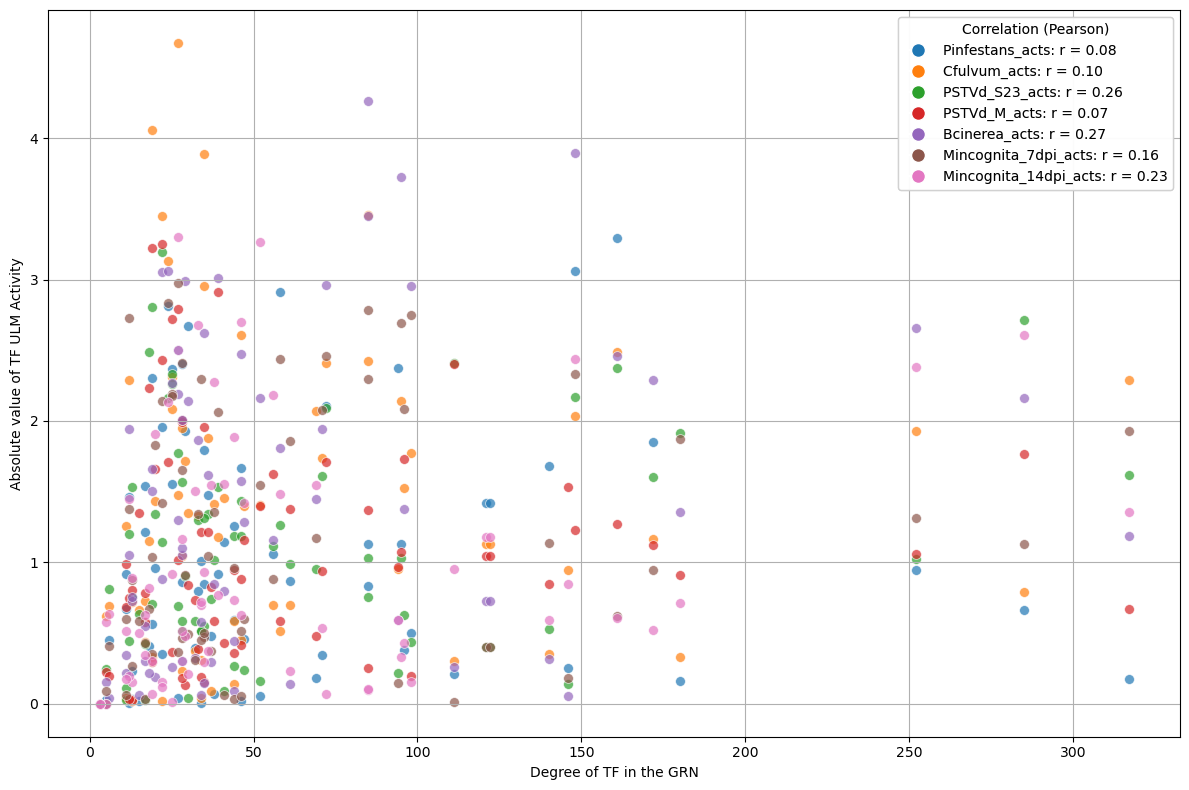

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))

# Set color palette for conditions
palette = sns.color_palette("tab10", n_colors=len(long_df['Condition'].unique()))
conditions = long_df['Condition'].unique()

# Dictionary to store correlation info
corr_dict = {}

# Loop through each condition to plot and store Pearson correlation and p-value
for idx, condition in enumerate(conditions):
    # Filter data for the current condition
    subset = long_df[long_df['Condition'] == condition].copy()
    subset['Value'] = abs(subset['Value'])
    
    # Plot scatter and regression line
    sns.scatterplot(
        data=subset,
        x='Total_Degree',
        y='Value',
        color=palette[idx],
        alpha=0.7,
        s=50,
        label=condition  # Add condition as label for the legend
    )
    
    # Calculate Pearson correlation coefficient and p-value
    if len(subset) > 1:  # Ensure there are at least two points to compute correlation
        corr, _ = pearsonr(subset['Total_Degree'], subset['Value'])
    else:
        corr, _ = np.nan, "N/A"
    
    # Store in dictionary
    corr_dict[condition] = f"r = {corr:.2f}"

# Customize the plot

plt.xlabel('Degree of TF in the GRN')
plt.ylabel('Absolute value of TF ULM Activity')
plt.grid(True)

# Create a second legend for correlation coefficients
corr_legend_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[idx], markersize=10, 
           label=f"{condition}: {corr_dict[condition]}")
    for idx, condition in enumerate(conditions)
]

# Add condition legend (default from seaborn)
# plt.legend(title="Condition", loc="upper left", bbox_to_anchor=(1, 1))  

# Add correlation legend
plt.gca().add_artist(plt.legend(handles=corr_legend_handles, title="Correlation (Pearson)", loc="upper right", bbox_to_anchor=(1, 1)))

# Adjust layout to make space for legends
plt.tight_layout()
plt.savefig('../Plot/Correlation_degree_activity.svg', format='svg')
plt.show()


In [43]:
Degree

,In_Degree,Out_Degree,Total_Degree
Gene_Name,,,
Solyc01g065540,0,13,13
Solyc12g010270,1,0,1
Solyc12g010250,1,0,1
Solyc11g068940,2,0,2
Solyc08g080690,7,0,7
...,...,...,...
Solyc03g034150,1,0,1
Solyc03g025510,1,0,1
Solyc02g087090,1,0,1


In [44]:
df=Res_TDA[['OLN','Family','Clusters','MegaCluster','Groups']]
df = df.set_index('OLN')

In [45]:
degree_tda = pd.merge(df, Degree, left_index=True, right_index=True, how='left')

*****